Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.3  
Zadnji put ažurirano: 6. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **19. 10. 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od osam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

In [3]:
X.shape

(4, 1)

In [4]:
y.shape

(4,)

In [5]:
y = np.expand_dims(y, axis=1)

In [6]:
y.shape

(4, 1)

In [7]:
X

array([[0],
       [1],
       [2],
       [4]])

In [8]:
y

array([[4],
       [1],
       [2],
       [5]])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [9]:
from sklearn.preprocessing import PolynomialFeatures

d = 1

poly = PolynomialFeatures(d)
phi = poly.fit_transform(X)
phi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

In [10]:
phi.shape

(4, 2)

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [11]:
from numpy import linalg

w = np.linalg.inv(phi.T@phi)@phi.T@y
w

array([[2.2       ],
       [0.45714286]])

In [12]:
np.linalg.pinv(phi)@y

array([[2.2       ],
       [0.45714286]])

Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

h(x_tilde) = 2.2 * x_0 + 0.45714286 * x_1

h([1, 0]) = 2.2 * 1 + 0.45714286 * 0 -> za prvi redak iz matrice dizajna

In [13]:
E = 1/2*((phi@w-y).T@(phi@w-y))
E[0][0]

4.085714285714285

In [14]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, phi@w)
mse

2.0428571428571427

$MSE(h|\mathcal{D})=\frac{1}{N}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$

In [15]:
1/len(phi)*((phi@w-y).T@(phi@w-y))[0][0]

2.0428571428571427

In [16]:
phi@w

array([[2.2       ],
       [2.65714286],
       [3.11428571],
       [4.02857143]])

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [52]:
w = np.linalg.inv(phi)@y

LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [18]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(phi[:, 1:], y)
print(f"y-intercept: {reg.intercept_[0]}, slope: {reg.coef_[0][0]}")

y-intercept: 2.2, slope: 0.45714285714285713


In [19]:
reg.predict(phi[:, 1:])

array([[2.2       ],
       [2.65714286],
       [3.11428571],
       [4.02857143]])

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [20]:
def cubic_function(x):
    return 5 + x - 2*x**2 - 5*x**3

In [21]:
def make_labels(X, f, noise=0):
    
    y = np.array(list(map(f, X))) + np.expand_dims(noise, axis=1)
    return y

In [22]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [23]:
from numpy.random import normal

N = 50
X = make_instances(-5, 5, N)
mu = 0
sigma = 200
noise = np.random.normal(mu, sigma, N)
y = make_labels(X, cubic_function, noise)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

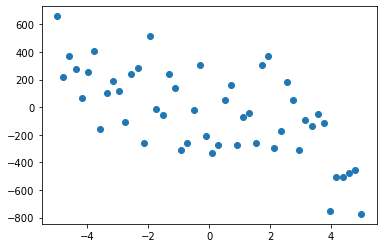

In [24]:
plt.scatter(X, y)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

In [25]:
d = 3
poly = PolynomialFeatures(d)
phi = poly.fit_transform(X)
phi.shape

(50, 4)

In [26]:
poly_reg = LinearRegression().fit(phi[:, 1:], y)

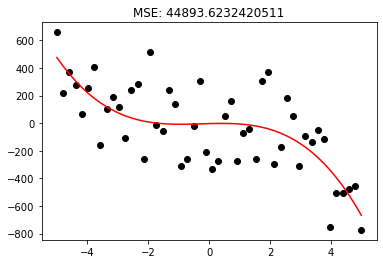

In [27]:
plt.scatter(X, y, c='k')
plt.plot(X, poly_reg.predict(phi[:, 1:]), c='r')
plt.title(f"MSE: {mean_squared_error(y, poly_reg.predict(phi[:, 1:]))}")
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

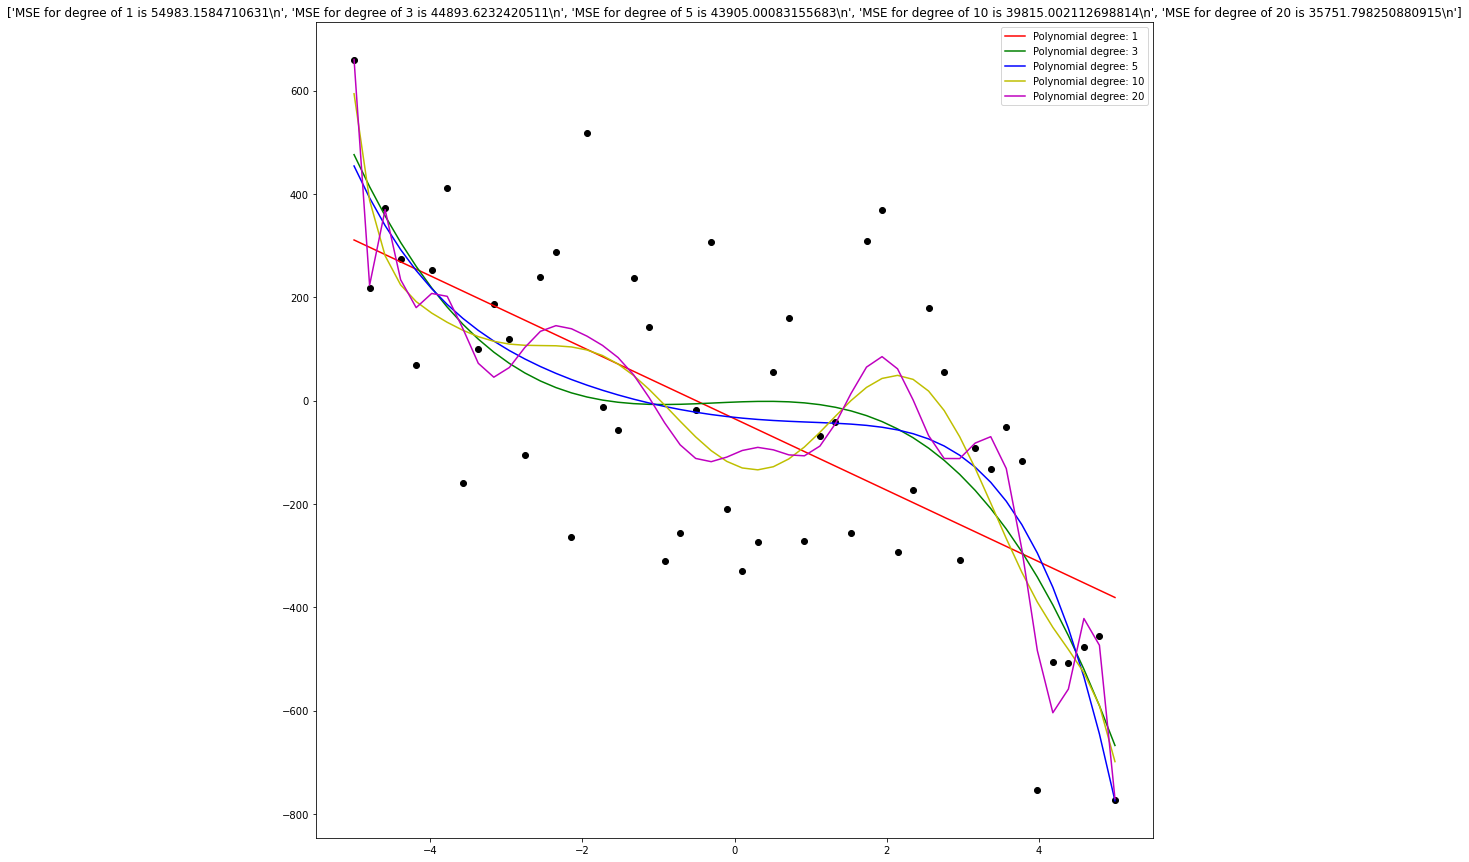

In [28]:
degree = [1, 3, 5, 10, 20]
color = ['r', 'g', 'b', 'y', 'm']
mse = []
plt.figure(figsize=(15, 15))
plt.scatter(X, y, c='k')

for d, c in zip(degree, color):
    poly = PolynomialFeatures(d)
    phi = poly.fit_transform(X)
    poly_reg = LinearRegression().fit(phi[:, 1:], y)
    mse.append((d, mean_squared_error(y, poly_reg.predict(phi[:, 1:]))))
    plt.plot(X, poly_reg.predict(phi[:, 1:]), c=c, label=f'Polynomial degree: {d}')


plt.title([f"MSE for degree of {d} is {mse}\n" for d, mse in mse])
plt.legend()
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

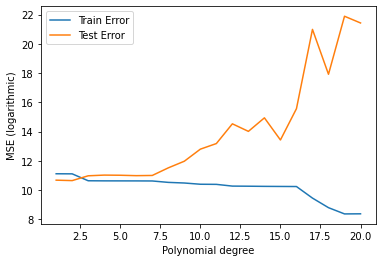

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)
degree = range(1, 21)
train_error = []
test_error = []

for d in degree:
    poly = PolynomialFeatures(d)
    phi_train = poly.fit_transform(X_train)
    phi_test = poly.fit_transform(X_test)
    poly_reg = LinearRegression().fit(phi_train[:, 1:], y_train)
    train_error.append(mean_squared_error(y_train, poly_reg.predict(phi_train[:, 1:])))
    test_error.append(mean_squared_error(y_test, poly_reg.predict(phi_test[:, 1:])))

plt.plot(degree, np.log(train_error), label='Train Error')
plt.plot(degree, np.log(test_error), label='Test Error')
plt.xlabel('Polynomial degree')
plt.ylabel('MSE (logarithmic)')
plt.legend()
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

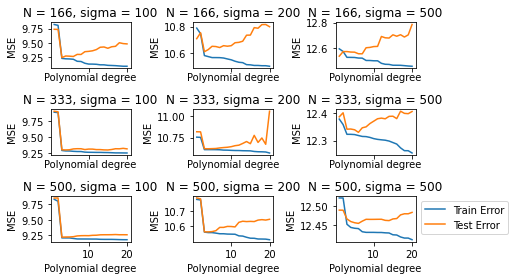

In [30]:
size = 1000
X_l = make_instances(-5, 5, size)
X_train, X_test = train_test_split(X_l, test_size=.5, random_state=42)
mu = 0
N = [1/3, 2/3, 1]
sigma = [100, 200, 500]
degree = range(1, 21)

fig, axs = plt.subplots(len(N), len(sigma), sharex=True)

for i, n in enumerate(N):
    for j, s in enumerate(sigma):
        train_error = []
        test_error = []
        X_train_ = np.random.choice(X_train.flatten(), size=int(n*len(X_train)), replace=False)
        X_test_ = np.random.choice(X_test.flatten(), size=int(n*len(X_test)), replace=False)
        
        noise = np.random.normal(mu, s, len(X_train_))
        
        y_train = make_labels(X_train_[:, None], cubic_function, noise)
        y_test = make_labels(X_test_[:, None], cubic_function, noise)

        for d in degree:
            poly = PolynomialFeatures(d)
            phi_train = poly.fit_transform(np.expand_dims(X_train_, axis=1))
            phi_test = poly.fit_transform(np.expand_dims(X_test_, axis=1))
            poly_reg = LinearRegression().fit(phi_train, y_train)
            train_error.append(mean_squared_error(y_train, poly_reg.predict(phi_train)))
            test_error.append(mean_squared_error(y_test, poly_reg.predict(phi_test)))

        axs[i, j].plot(degree, np.log(train_error), label='Train Error')    
        axs[i, j].plot(degree, np.log(test_error), label='Test Error')
        axs[i, j].title.set_text(f'N = {int(n*len(X_train))}, sigma = {s}')
        axs[i, j].set_xlabel('Polynomial degree')
        axs[i, j].set_ylabel('MSE')
        

fig.tight_layout()
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [31]:
X_s = np.array([[0],[1],[2],[4]])
y_s = np.array([4,1,2,5])
y_s = np.expand_dims(y_s, axis=1)

d = 3

lambdas = [0, 1, 10]

poly = PolynomialFeatures(d)
phi = poly.fit_transform(X_s)
w_s = []

for l in lambdas:
    w_s.append(np.linalg.inv(phi.T@phi + np.diag([0] + [l]*(len(phi.T@phi)-1)))@phi.T@y_s)
for w, l in zip(w_s, lambdas):
    print(f"Weights for the lambda {l} are {w.T[0]}")

Weights for the lambda 0 are [ 4.         -5.91666667  3.375      -0.45833333]
Weights for the lambda 1 are [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Weights for the lambda 10 are [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [32]:
from sklearn.linear_model import Ridge

alphas = [0, 1, 10]
w_s = []

for a in alphas:
    reg = Ridge(alpha=a).fit(phi[:, 1:], y_s)
    w_s.append(np.concatenate((reg.intercept_, reg.coef_.flatten())))
    
for w, a in zip(w_s, alphas):
    print(f"Weights for the lambda {a} are {w}")

Weights for the lambda 0 are [ 4.         -5.91666667  3.375      -0.45833333]
Weights for the lambda 1 are [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Weights for the lambda 10 are [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

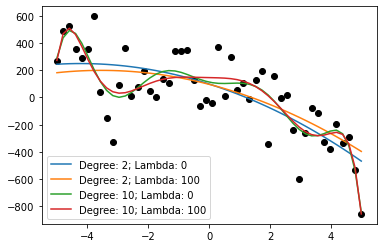

In [33]:
size = 50
X = make_instances(-5, 5, size)
mu = 0
sigma = 200
noise = np.random.normal(mu, sigma, size)
y = make_labels(X, cubic_function, noise)
degrees = [2, 10]
lambdas = [0, 100]

plt.scatter(X, y, c='k')

for d in degrees:
    for l in lambdas:
        poly = PolynomialFeatures(d)
        phi = poly.fit_transform(X)
        poly_reg = Ridge(alpha=l).fit(phi[:, 1:], y)
        plt.plot(X, poly_reg.predict(phi[:, 1:]), label=f"Degree: {d}; Lambda: {l}")

plt.legend()
plt.show()

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


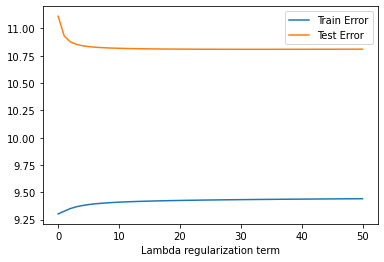

In [34]:
X = make_instances(-5, 5, size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)
degree = 10
lambdas = range(0, 51)
train_error = []
test_error = []

for l in lambdas:
    poly = PolynomialFeatures(degree)
    phi_train = poly.fit_transform(X_train)
    phi_test = poly.fit_transform(X_test)
    poly_reg = Ridge(alpha=l).fit(phi_train[:, 1:], y_train)
    train_error.append(mean_squared_error(y_train, poly_reg.predict(phi_train[:, 1:])))
    test_error.append(mean_squared_error(y_test, poly_reg.predict(phi_test[:, 1:])))
    
plt.plot(lambdas, np.log(train_error), label='Train Error')
plt.plot(lambdas, np.log(test_error), label='Test Error')
plt.xlabel('Lambda regularization term')
plt.legend()
plt.show()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [35]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

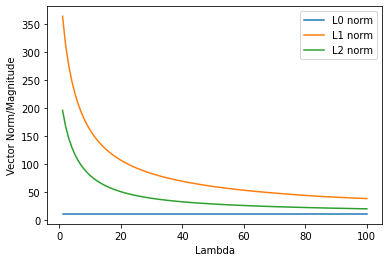

In [36]:
size = 50
X = make_instances(-5, 5, size)
mu = 0
sigma = 200
noise = np.random.normal(mu, sigma, size)
y = make_labels(X, cubic_function, noise)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

norm_0 = []
norm_1 = []
norm_2 = []

degree = 5
lambdas = range(1, 101)
norms = dict()

for l in lambdas:
    poly = PolynomialFeatures(d)
    phi = poly.fit_transform(X)
    poly_reg = Ridge(alpha=l).fit(phi[:, 1:], y)
    norm_0.append(np.linalg.norm(np.concatenate((poly_reg.coef_.flatten(), poly_reg.intercept_)), ord=0))
    norm_1.append(np.linalg.norm(np.concatenate((poly_reg.coef_.flatten(), poly_reg.intercept_)), ord=1))
    norm_2.append(np.linalg.norm(np.concatenate((poly_reg.coef_.flatten(), poly_reg.intercept_)), ord=2))
    
    
plt.plot(lambdas, norm_0, label='L0 norm')
plt.plot(lambdas, norm_1, label='L1 norm')
plt.plot(lambdas, norm_2, label='L2 norm')
plt.xlabel('Lambda')
plt.ylabel('Vector Norm/Magnitude')
plt.legend()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

C:\Users\Matija\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 721208.7738944774, tolerance: 552.4904475992175
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matija\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 723695.1861749102, tolerance: 552.4904475992175
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matija\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 725897.9453226475, tolerance: 552.4904475992175
  model = cd_fast.enet_coordinate_descent(
C:\Users\Matija\miniconda3\envs\myenv\lib\site-packages\sklearn\linear

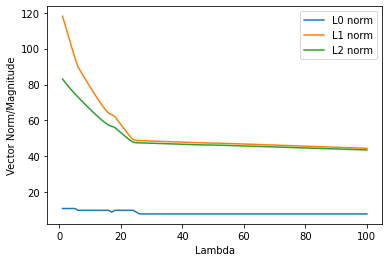

In [37]:
from sklearn.linear_model import Lasso

size = 50
X = make_instances(-5, 5, size)
mu = 0
sigma = 200
noise = np.random.normal(mu, sigma, size)
y = make_labels(X, cubic_function, noise)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

norm_0 = []
norm_1 = []
norm_2 = []

degree = 5
lambdas = range(1, 101)

for l in lambdas:
    poly = PolynomialFeatures(d)
    phi = poly.fit_transform(X)
    poly_reg = Lasso(alpha=l).fit(phi[:, 1:], y)
    norm_0.append(np.linalg.norm(np.concatenate((poly_reg.intercept_, poly_reg.coef_.flatten())), ord=0))
    norm_1.append(np.linalg.norm(np.concatenate((poly_reg.intercept_, poly_reg.coef_.flatten())), ord=1))
    norm_2.append(np.linalg.norm(np.concatenate((poly_reg.intercept_, poly_reg.coef_.flatten())), ord=2))
    
    
plt.plot(lambdas, norm_0, label='L0 norm')
plt.plot(lambdas, norm_1, label='L1 norm')
plt.plot(lambdas, norm_2, label='L2 norm')
plt.xlabel('Lambda')
plt.ylabel('Vector Norm/Magnitude')
plt.legend()
plt.show()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [38]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

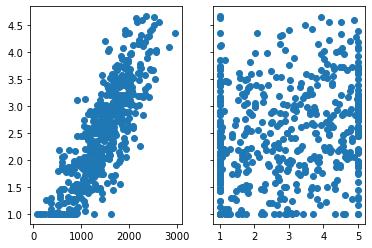

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(grades_X[:, 0], grades_y)
ax2.scatter(grades_X[:, 1], grades_y)
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [40]:
alpha = .01
poly_reg = Ridge(alpha=alpha).fit(grades_X, grades_y)

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [41]:
from sklearn.preprocessing import StandardScaler

grades_X_fixed = StandardScaler().fit(grades_X).transform(grades_X)
grades_y_fixed = StandardScaler().fit(np.expand_dims(grades_y, axis=1)).transform(np.expand_dims(grades_y, axis=1))

alpha = .01
poly_reg_scaled = Ridge(alpha=alpha).fit(grades_X_fixed, grades_y_fixed)

In [42]:
poly_reg_scaled.intercept_, poly_reg_scaled.coef_

(array([8.62551331e-17]), array([[0.81630375, 0.15167761]]))

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [43]:
grades_X_fixed_colinear = np.append(grades_X_fixed, grades_X_fixed[:, -1, None], axis=1)

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [44]:
alpha = .01
poly_reg_scaled_colinear = Ridge(alpha=alpha).fit(grades_X_fixed_colinear, grades_y_fixed)

In [45]:
poly_reg_scaled_colinear.intercept_, poly_reg_scaled_colinear.coef_

(array([8.6255971e-17]), array([[0.81630364, 0.07583957, 0.07583957]]))

In [46]:
poly_reg_scaled.intercept_, poly_reg_scaled.coef_

(array([8.62551331e-17]), array([[0.81630375, 0.15167761]]))

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [47]:
alphas = [.01, 1000]
weights = []


for i in range(10):
    random_sample_X, _, random_sample_y, _ = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=.5)
    for a in alphas:
        poly_reg_colinear = Ridge(alpha=a).fit(random_sample_X, random_sample_y)
        weights.append(np.concatenate((poly_reg_colinear.intercept_ , poly_reg_colinear.coef_.flatten())))

weights_s = np.array(weights[::2])
weights_l = np.array(weights[1::2])

In [48]:
weights_s

array([[-0.01045662,  0.79385128,  0.06504303,  0.06504303],
       [ 0.02152062,  0.80739011,  0.0761075 ,  0.0761075 ],
       [ 0.00921447,  0.814158  ,  0.07673386,  0.07673386],
       [-0.01820559,  0.83265053,  0.07483515,  0.07483515],
       [ 0.01261939,  0.79735626,  0.08013669,  0.08013669],
       [ 0.00283109,  0.81845427,  0.04525193,  0.04525193],
       [-0.04553636,  0.80086373,  0.0614553 ,  0.0614553 ],
       [ 0.00861207,  0.81216485,  0.06648337,  0.06648337],
       [-0.01197704,  0.81501911,  0.04444567,  0.04444567],
       [-0.01779144,  0.81925961,  0.07443972,  0.07443972]])

In [49]:
weights_l

array([[-0.0234989 ,  0.16436364,  0.03812874,  0.03812874],
       [ 0.03212117,  0.15992321,  0.02415424,  0.02415424],
       [-0.02601733,  0.16128257,  0.02717137,  0.02717137],
       [-0.04966402,  0.16579999,  0.03405283,  0.03405283],
       [-0.0250465 ,  0.15703356,  0.02664742,  0.02664742],
       [ 0.01706322,  0.17833349,  0.03188297,  0.03188297],
       [-0.05404667,  0.15563723,  0.022474  ,  0.022474  ],
       [ 0.02380943,  0.16174675,  0.03077003,  0.03077003],
       [ 0.04530425,  0.16591703,  0.01772788,  0.01772788],
       [-0.06105433,  0.16617211,  0.03087282,  0.03087282]])

In [50]:
np.std(weights_s, axis=0)

array([0.0187671 , 0.01102672, 0.01216945, 0.01216945])

In [51]:
np.std(weights_l, axis=0)

array([0.03667299, 0.00602766, 0.00567524, 0.00567524])

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.